In [1]:
import pandas as pd
import os
import csv
import math
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)



In [2]:
df = pd.read_excel (r'Mappings.xlsx')


In [3]:
!pip install openpyxl

In [4]:
df.head(10)

,UserID,Systolic,Diastolic,Heart Rate,Timestamp,DOB,Weight,Height,Gender
0,9690,125.0,87.0,98.0,2018-05-16 11:00:00,1973-05-08,96.0,177,M
1,9690,121.0,84.0,39.5,2018-05-16 12:00:00,1973-05-08,96.0,177,M
2,9690,122.5,84.0,44.5,2018-05-16 13:00:00,1973-05-08,96.0,177,M
3,9690,123.0,80.0,80.0,2018-05-16 14:00:00,1973-05-08,96.0,177,M
4,9690,125.0,78.0,72.0,2018-05-16 15:00:00,1973-05-08,96.0,177,M
5,9690,114.0,74.0,64.0,2018-05-16 16:00:00,1973-05-08,96.0,177,M
6,9690,124.0,82.0,86.0,2018-05-16 17:00:00,1973-05-08,96.0,177,M
7,9690,128.0,88.0,97.0,2018-05-16 18:00:00,1973-05-08,96.0,177,M
8,9690,121.0,83.0,91.0,2018-05-16 21:00:00,1973-05-08,96.0,177,M
9,9690,126.0,78.0,80.0,2018-05-16 22:00:00,1973-05-08,96.0,177,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18842 entries, 0 to 18841
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   UserID      18842 non-null  int64         
 1   Systolic    18842 non-null  float64       
 2   Diastolic   18842 non-null  float64       
 3   Heart Rate  18842 non-null  float64       
 4   Timestamp   18842 non-null  datetime64[ns]
 5   DOB         18842 non-null  datetime64[ns]
 6   Weight      18842 non-null  float64       
 7   Height      18842 non-null  int64         
 8   Gender      18842 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 1.3+ MB


There are 5 userID in the dataset

In [6]:
df['UserID'].unique() 

array([ 9690,  9630, 10049, 10412,  9888], dtype=int64)

no missing values

In [7]:
df.isnull().sum()


UserID        0
Systolic      0
Diastolic     0
Heart Rate    0
Timestamp     0
DOB           0
Weight        0
Height        0
Gender        0
dtype: int64

count plot 

C:\Users\User\anaconda3\envs\Hypertension_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


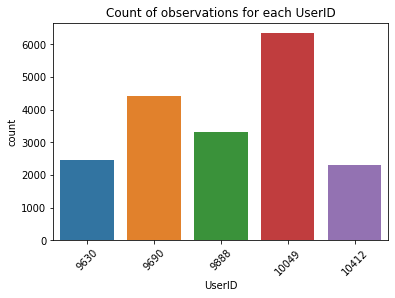

In [8]:
for col in ['UserID']:
    sns.countplot(df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.title('Count of observations for each UserID')
    plt.show()

In [9]:
df.describe()

,UserID,Systolic,Diastolic,Heart Rate,Weight,Height
count,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000
mean,9926.460461,120.576760,81.350907,79.417084,64.442363,163.748540
std,242.508896,5.459459,5.434113,17.556198,21.122365,8.870709
min,9630.000000,91.000000,71.000000,0.000000,44.500000,155.000000
25%,9690.000000,119.000000,77.000000,70.000000,44.500000,158.000000
50%,9888.000000,122.000000,81.000000,80.000000,52.000000,158.000000
75%,10049.000000,124.000000,85.000000,89.000000,83.000000,172.000000
max,10412.000000,128.000000,101.000000,128.000000,96.000000,177.000000


UserID
9630     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
9690     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
9888     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
10049    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
10412    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

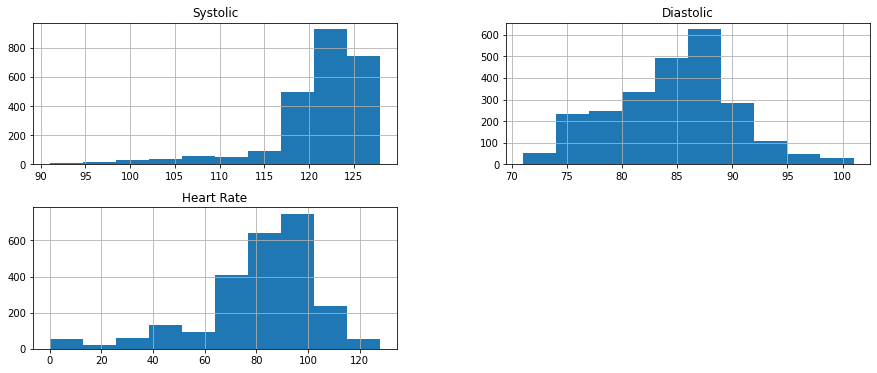

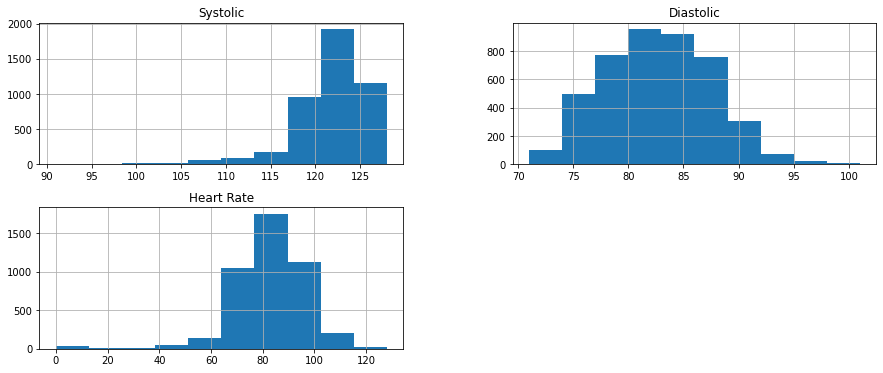

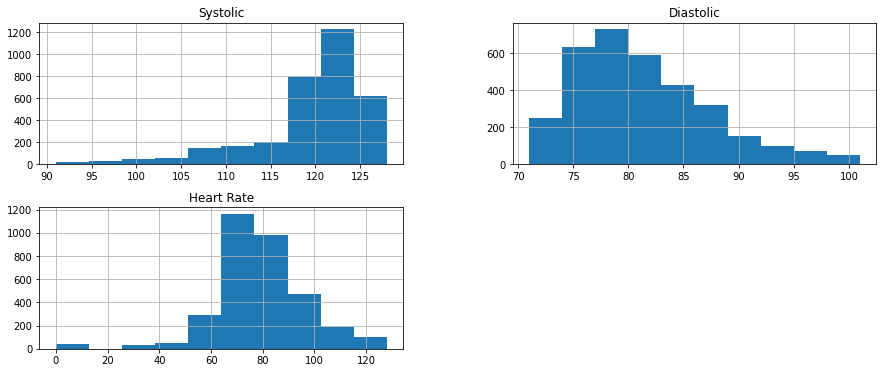

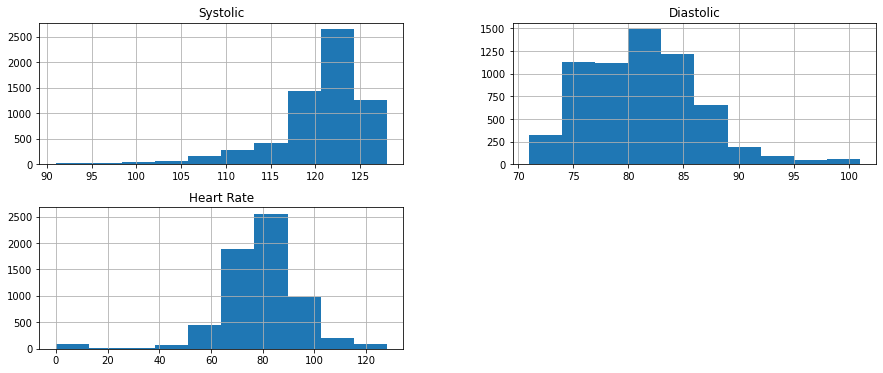

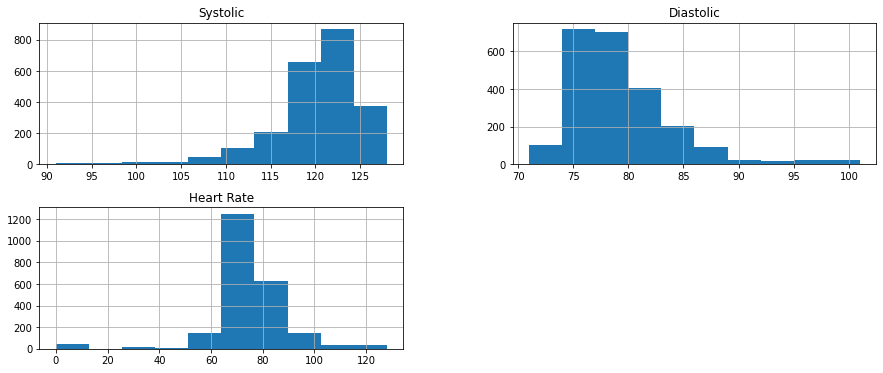

In [10]:
num =['Systolic','Diastolic','Heart Rate']
df.groupby(df['UserID']).hist(column = num,figsize = (15,6))

UserID
9630     AxesSubplot(0.125,0.125;0.775x0.755)
9690     AxesSubplot(0.125,0.125;0.775x0.755)
9888     AxesSubplot(0.125,0.125;0.775x0.755)
10049    AxesSubplot(0.125,0.125;0.775x0.755)
10412    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

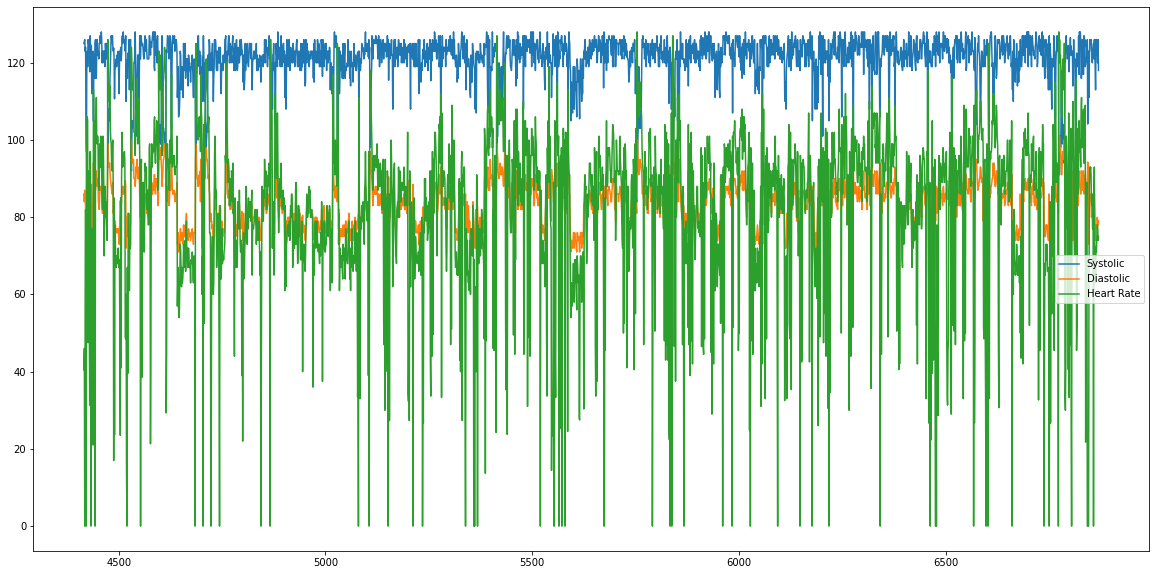

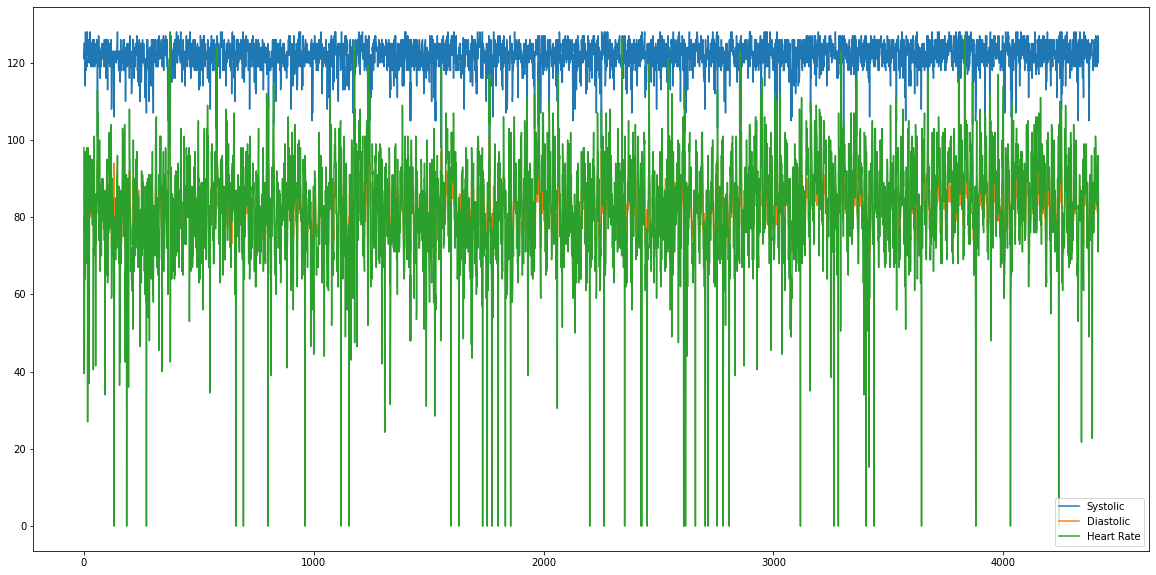

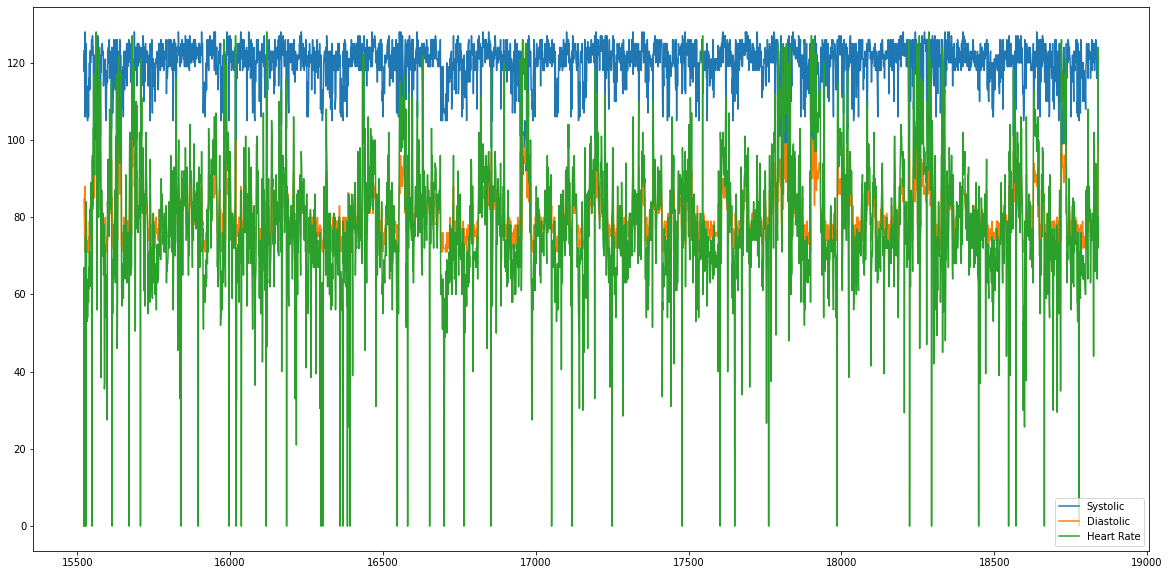

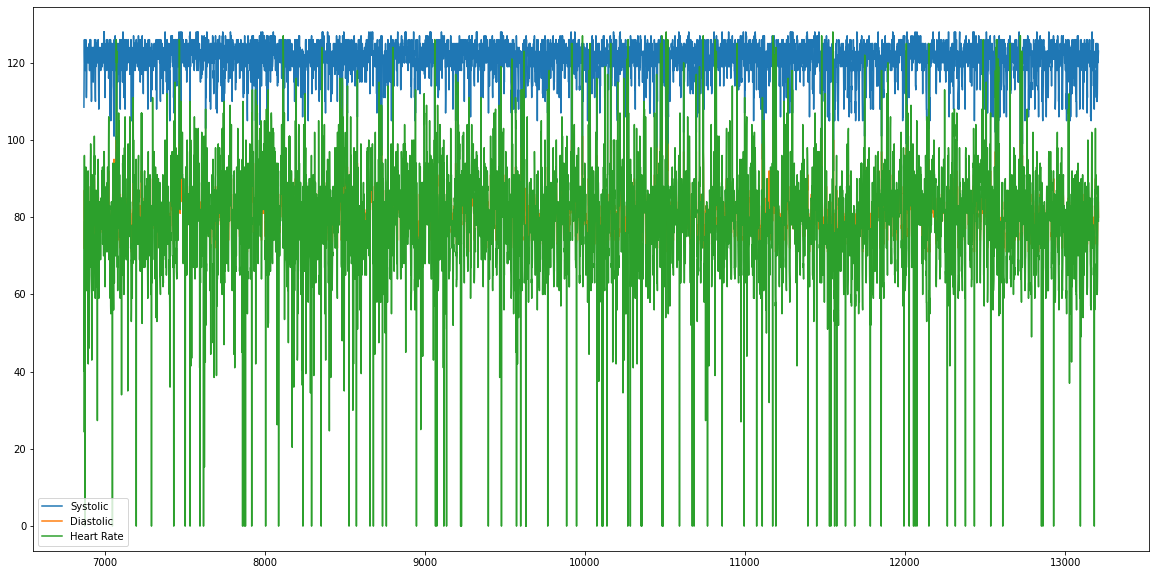

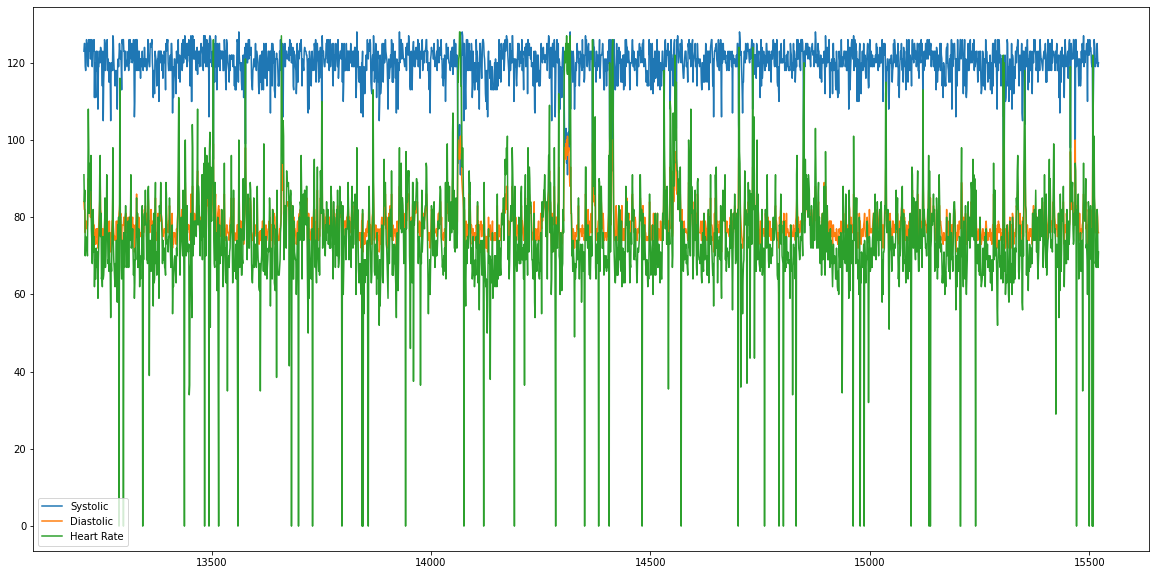

In [11]:
#df.set_index('Timestamp', inplace=True)
df.groupby(df['UserID'])[num].plot(figsize = (20,10))

Gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

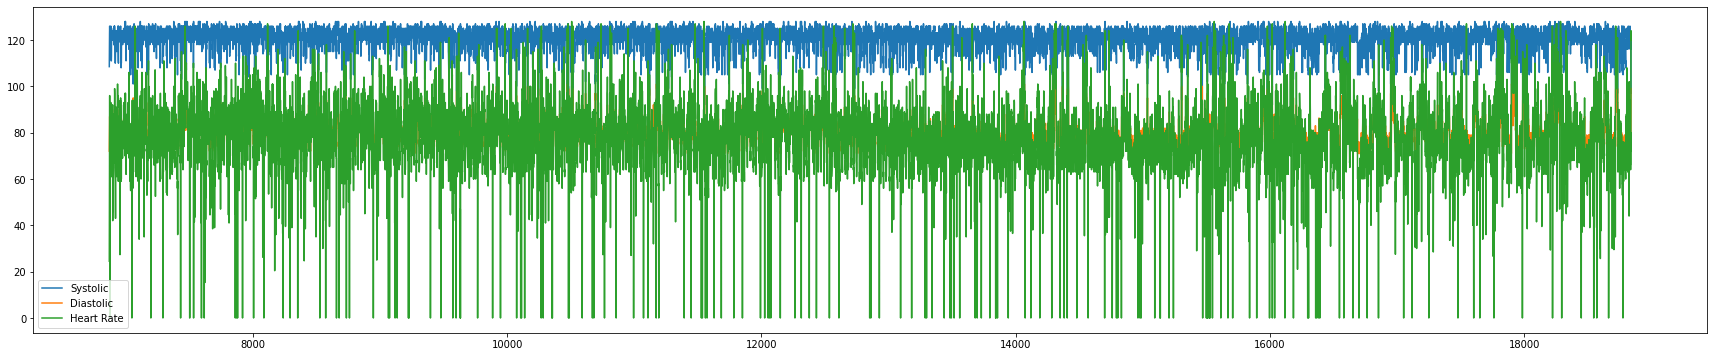

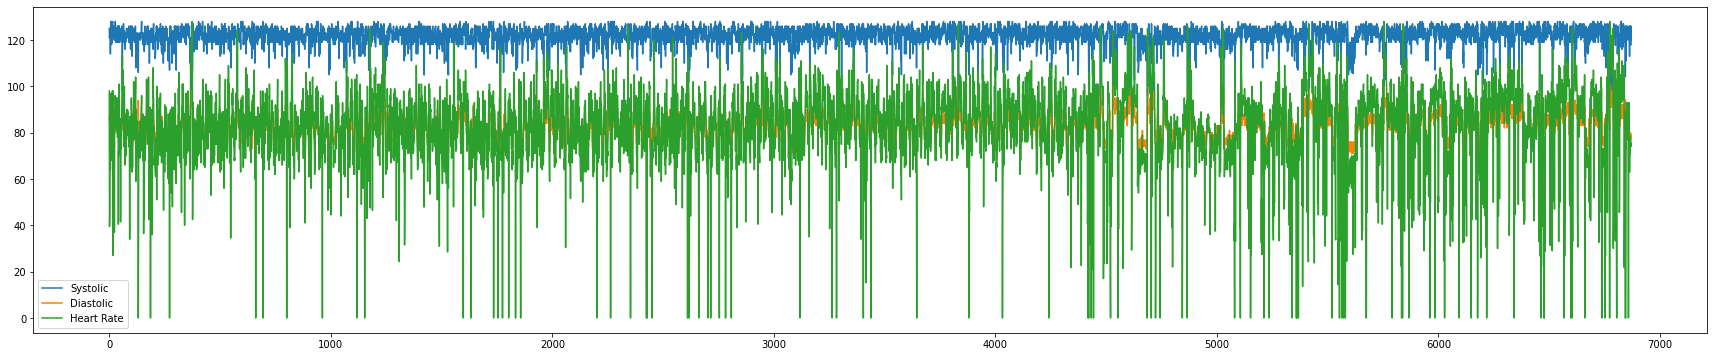

In [12]:
df.groupby(df['Gender'])[num].plot(figsize = (30,6))

In [13]:
df["Timestamp"].max()


Timestamp('2019-03-23 21:00:00')

In [14]:
df["Timestamp"].min()


Timestamp('2018-04-23 13:00:00')